In [1]:
from keras.datasets import mnist
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(train_images.shape)
train_images=train_images.reshape(train_images.shape[0],train_images.shape[1]*train_images.shape[2])
print(train_images.shape)
test_images=test_images.reshape(test_images.shape[0],test_images.shape[1]*test_images.shape[2])
print(train_images.shape)

Using TensorFlow backend.


(60000, 28, 28)
(60000, 784)
(60000, 784)


In [2]:
# normalize training img and test img
train_images_normalised = train_images/255.0
test_images_normalised = test_images/255.0

In [3]:
train_img_tr = train_images_normalised.transpose()
test_img_tr = test_images_normalised.transpose()
train_label_tr = train_labels.reshape(1,train_labels.shape[0])
test_label_tr = test_labels.reshape(1,test_labels.shape[0])

In [4]:
print(train_img_tr.shape)
print(test_img_tr.shape)
print(train_label_tr.shape)
print(test_label_tr.shape)

(784, 60000)
(784, 10000)
(1, 60000)
(1, 10000)


In [5]:
dim_train = train_img_tr.shape[1]
dim_test = test_img_tr.shape[1]
print("The training dataset has dimensions equal to", dim_train)
print("The test set has dimensions equal to", dim_test)

The training dataset has dimensions equal to 60000
The test set has dimensions equal to 10000


In [6]:
# let find digit 9
#print (train_label_tr[0][5:30])
train_label_shifted_nine = train_label_tr//9
#print (train_label_shifted[0][5:30])
test_label_shifted_nine = test_label_tr//9

In [7]:
def sigmoid(z):
    s = 1.0 / (1.0 + np.exp(-z))
    return s

In [8]:
def initialize(dim):
    w = np.zeros((dim,1))
    b = 0   
    return w,b

In [37]:

def propagate(w, b, X, Y):
    
    m = X.shape[1]
    
    z = np.dot(w.T,X)+b
    
    A = sigmoid(z)

    
    cost = 1.0/m*(1/2)*np.dot((A-Y),(A-Y).T)
    
    #dw = 1.0/m*np.dot(X,(A-Y).T)    #a(1-a)(a-y)Xj
    dw=1.0/m*np.dot(np.dot(np.dot(X,(1-A).T),A),(A-Y).T) # X * (1-A) *A *(A-Y)
    db = 1.0/m*np.sum(np.dot(np.dot((A-Y),A.T),(1-A)))
    assert (dw.shape == w.shape)
    assert (db.dtype == float)
    
    cost = np.squeeze(cost)
    assert (cost.shape == ())
    
    grads = {"dw": dw, 
             "db":db}
    
    return grads, cost

In [10]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):

    costs = []
    
    for i in range(num_iterations):
        
        grads, cost = propagate(w, b, X, Y)
        
        dw = grads["dw"]
        db = grads["db"]
        
        w = w - learning_rate*dw
        b = b - learning_rate*db
        
        if i % 100 == 0:
            costs.append(cost)
            
        if print_cost and i % 100 == 0:
            print ("Cost (iteration %i) = %f" %(i, cost))
            
    grads = {"dw": dw, "db": db}
    params = {"w": w, "b": b}
        
    return params, grads, costs

In [11]:
def predict (w, b, X):
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0],1)
    A = sigmoid (np.dot(w.T, X)+b)
    for i in range(A.shape[1]):
        if (A[:,i] > 0.5): 
            Y_prediction[:, i] = 1
        elif (A[:,i] <= 0.5):
            Y_prediction[:, i] = 0
            
    assert (Y_prediction.shape == (1,m))
    
    return Y_prediction

In [66]:
def model (X_train, Y_train, X_test, Y_test, num_iterations = 1000, learning_rate = 0.5, print_cost = False):
    
    w, b = initialize(X_train.shape[0])
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    w = parameters["w"]
    b = parameters["b"]
    
    Y_prediction_test = predict (w, b, X_test)
    Y_prediction_train = predict (w, b, X_train)
    
    train_accuracy = 100.0 - np.mean(np.abs(Y_prediction_train-Y_train)*100.0)
    test_accuracy = 100.0 - np.mean(np.abs(Y_prediction_test-Y_test)*100.0)
    
    d = {"costs": costs,
        "Y_prediction_test": Y_prediction_test,
        "Y_prediction_train": Y_prediction_train,
         "w": w,
         "b": b,
         "learning_rate": learning_rate,
         "num_iterations": num_iterations}
    
    print ("Accuarcy Test: ",  test_accuracy)
    print ("Accuracy Train: ", train_accuracy)
    
    print(X_test.shape)
    print(len(X_test[0]))
    m_test=X_test[7,len(X_test[0])]
    print(m_test.shape)
    #m_res=predict (w, b, X_train)
    
    
    return d

In [67]:
Xtrain = train_img_tr
ytrain = train_label_shifted_nine
Xtest = test_img_tr
ytest = test_label_shifted_nine
d = model (Xtrain, 
           ytrain, 
           Xtest, 
           ytest, 
           num_iterations = 100, 
           learning_rate = 0.5, 
           print_cost = True)

Cost (iteration 0) = 0.125000


C:\Anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


Accuarcy Test:  89.91
Accuracy Train:  90.08500000000001
(784, 10000)
10000


IndexError: index 10000 is out of bounds for axis 1 with size 10000

In [40]:
def plot_digit(some_digit):
    
    some_digit_image = some_digit.reshape(28,28)

    plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
    plt.axis("off")
    plt.show()

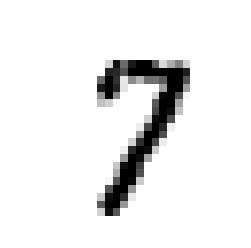

(60000, 784)


In [55]:
plot_digit(train_images[307])
print(train_images.shape)

In [48]:
print(train_labels[307])

7
